## Import the necessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [47]:
data = pd.read_csv('/content/Employee.csv')
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


# Data Exploration

## Check the info of the data in each datatype

In [48]:
data.shape

(74498, 24)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

Here all the columns have a different datatype:

Integer - Employee ID, Age, Years at Company, Monthly Income, Distance from Home and Company Tenure

Float - Number of Promotions, Number of Dependents

String - Gender, Job Role, Work Life Balance, Job Satisfaction, Performance Rating, OverTime, education Level, Martial Status, Job Level, Company Size, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition

## Check the missing values of each colum in the data

In [50]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

Based on the missing values, we can see that, Work-Life Balance, Performance Rating, Number of Promotions, Education Level, Martial Status, Number of Dependents, Job Level, Company Size, Remote Work and Employee Recognition are under float and object datatypes.

Here Employee Recognition, Remote Work, Company Size, Job Level, Performance Rating, Work Life Balance, Education Level, Martial Status are unnecssary columns. So we have to drop them.

In [51]:
data.drop(['Employee Recognition','Remote Work','Company Size','Job Level','Performance Rating',
           'Work-Life Balance','Education Level','Marital Status'], axis=1, inplace=True)

In [52]:
#Fill the missing values using mean method
data['Number of Promotions'].fillna(data['Number of Promotions'].mean(), inplace=True)
data['Number of Dependents'].fillna(data['Number of Dependents'].mean(), inplace=True)

## Now again check the missing values

In [53]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Job Satisfaction            0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Number of Dependents        0
Company Tenure              0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Attrition                   0
dtype: int64

As you can see, all the uneccessary columns are dropped and missing values have been filled

## Let's check the shape of our dataset

In [54]:
data.shape

(74498, 16)

Now the 24 columns is been reduced to 16 columns

### Now lets check all the categorical values and visualize them

## Gender Count

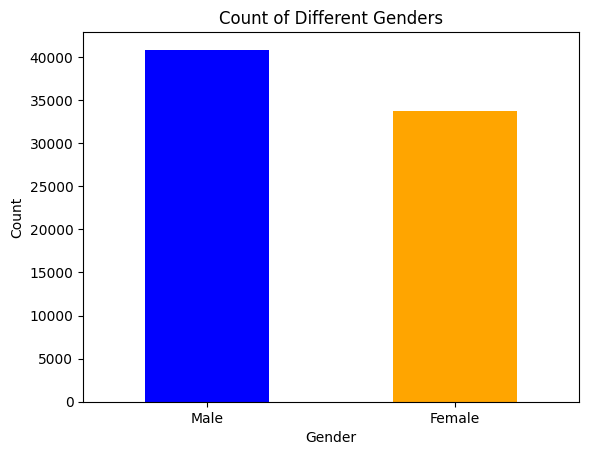

In [55]:
gender_dict = data['Gender'].value_counts()
gender_dict.plot(kind='bar',color=['blue','orange'], title="Count of Different Genders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [56]:
data['Gender'].value_counts()

Gender
Male      40826
Female    33672
Name: count, dtype: int64

From this chart, we can tell that Male employees have more count than the female employees

## Let's figure out how gender could be the reason for employees based on the attrition

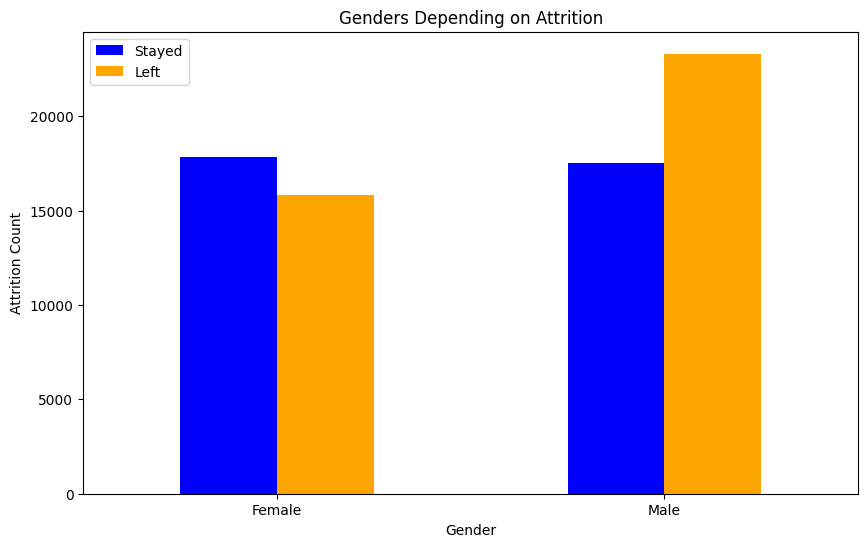

In [57]:
pd.crosstab(data['Gender'],data['Attrition']).plot(kind='bar',figsize=(10,6),color=['blue','orange'])
plt.title("Genders Depending on Attrition")
plt.xlabel("Gender")
plt.ylabel("Attrition Count")
plt.legend(["Stayed","Left"])
plt.xticks(rotation=0)
plt.show()

As based on the chart, males left the company most rather than females. But at most both males and females stayed in the company equally.  

## Job role Count

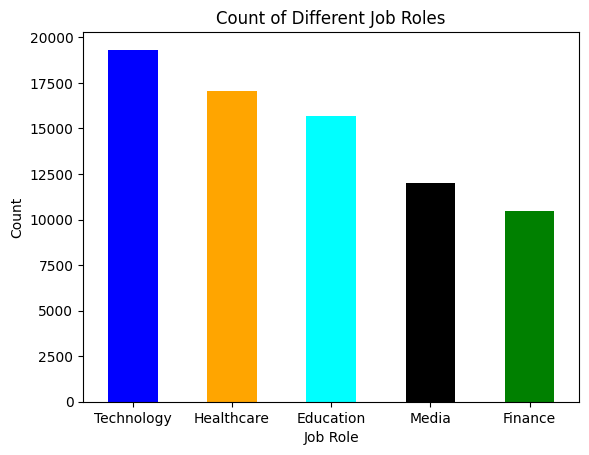

In [58]:
job_dict = data["Job Role"].value_counts()
job_dict.plot(kind='bar',color=['blue','orange','aqua','black','green'], title="Count of Different Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [59]:
data["Job Role"].value_counts()

Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64

Here, technology gives more count for the employee followed by healthcare, education, media and finanace as the least count

## Now if we function this with the attrition, we can figure which job role stays in the company or leave the company

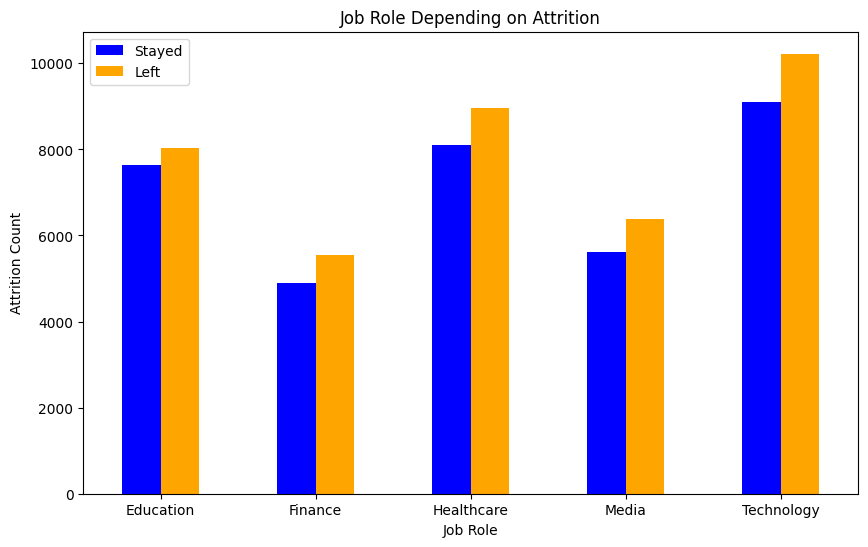

In [60]:
pd.crosstab(data['Job Role'],data['Attrition']).plot(kind='bar',figsize=(10,6),color=['blue','orange'])
plt.title("Job Role Depending on Attrition")
plt.xlabel("Job Role")
plt.ylabel("Attrition Count")
plt.legend(["Stayed","Left"])
plt.xticks(rotation=0)
plt.show()

We can see that max no of employees in technology role left the company above 10000 and below 10000 employees in techology role has stayed in the company

## Overtime Count

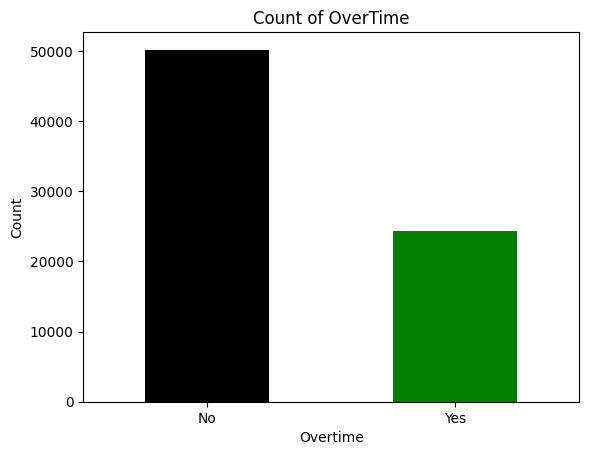

In [61]:
job_dict = data["Overtime"].value_counts()
job_dict.plot(kind='bar',color=['black','green'], title="Count of OverTime")
plt.xlabel("Overtime")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [62]:
data["Overtime"].value_counts()

Overtime
No     50157
Yes    24341
Name: count, dtype: int64

Here company's with no overtime has the most value count compared to comapanys with overtime

## If we compare with Job Role, we can find out which Job Role gets the most overtime and the least overtime

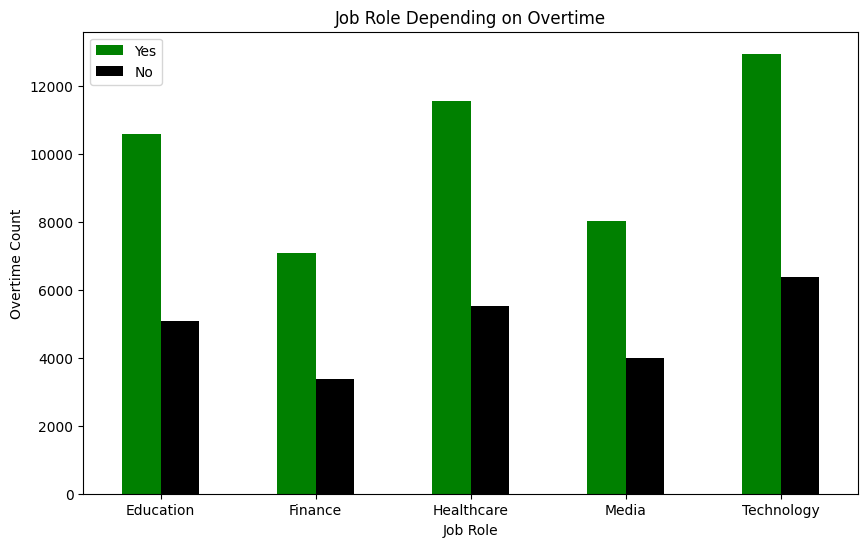

In [63]:
pd.crosstab(data['Job Role'],data['Overtime']).plot(kind='bar',figsize=(10,6),color=['green','black'])
plt.title("Job Role Depending on Overtime")
plt.xlabel("Job Role")
plt.ylabel("Overtime Count")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)
plt.show()

Based on the graph, all the job role company has the most rated overtime compared to the ones with least overtime. Technology gives the highest rate of overtime followed by healthcare.

# Data Preprocessing

In [64]:
# Lets drop the employee id, leadership opprtunities and innovation opportunities
data.drop(['Employee ID','Leadership Opportunities','Innovation Opportunities'], axis=1, inplace=True)

In [65]:
data.drop('Age', axis=1, inplace=True)

In [66]:
data.head()

,Gender,Years at Company,Job Role,Monthly Income,Job Satisfaction,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure,Company Reputation,Attrition
0,Male,19,Education,5390,Medium,2.0,No,22,0.0,89,Excellent,Stayed
1,Female,4,Media,5534,High,3.0,No,21,3.0,21,Fair,Stayed
2,Female,10,Healthcare,8159,High,0.0,No,11,3.0,74,Poor,Stayed
3,Female,7,Education,3989,High,1.0,No,27,2.0,50,Good,Stayed
4,Male,41,Education,4821,Very High,0.0,Yes,71,0.0,68,Fair,Stayed


In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Job Role'] = encoder.fit_transform(data['Job Role'])
data['Overtime'] = encoder.fit_transform(data['Overtime'])
data['Attrition'] = encoder.fit_transform(data['Attrition'])

In [68]:
data.drop(['Job Satisfaction','Company Reputation'],axis=1, inplace=True)

In [69]:
data.head()

,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure,Attrition
0,1,19,0,5390,2.0,0,22,0.0,89,1
1,0,4,3,5534,3.0,0,21,3.0,21,1
2,0,10,2,8159,0.0,0,11,3.0,74,1
3,0,7,0,3989,1.0,0,27,2.0,50,1
4,1,41,0,4821,0.0,1,71,0.0,68,1


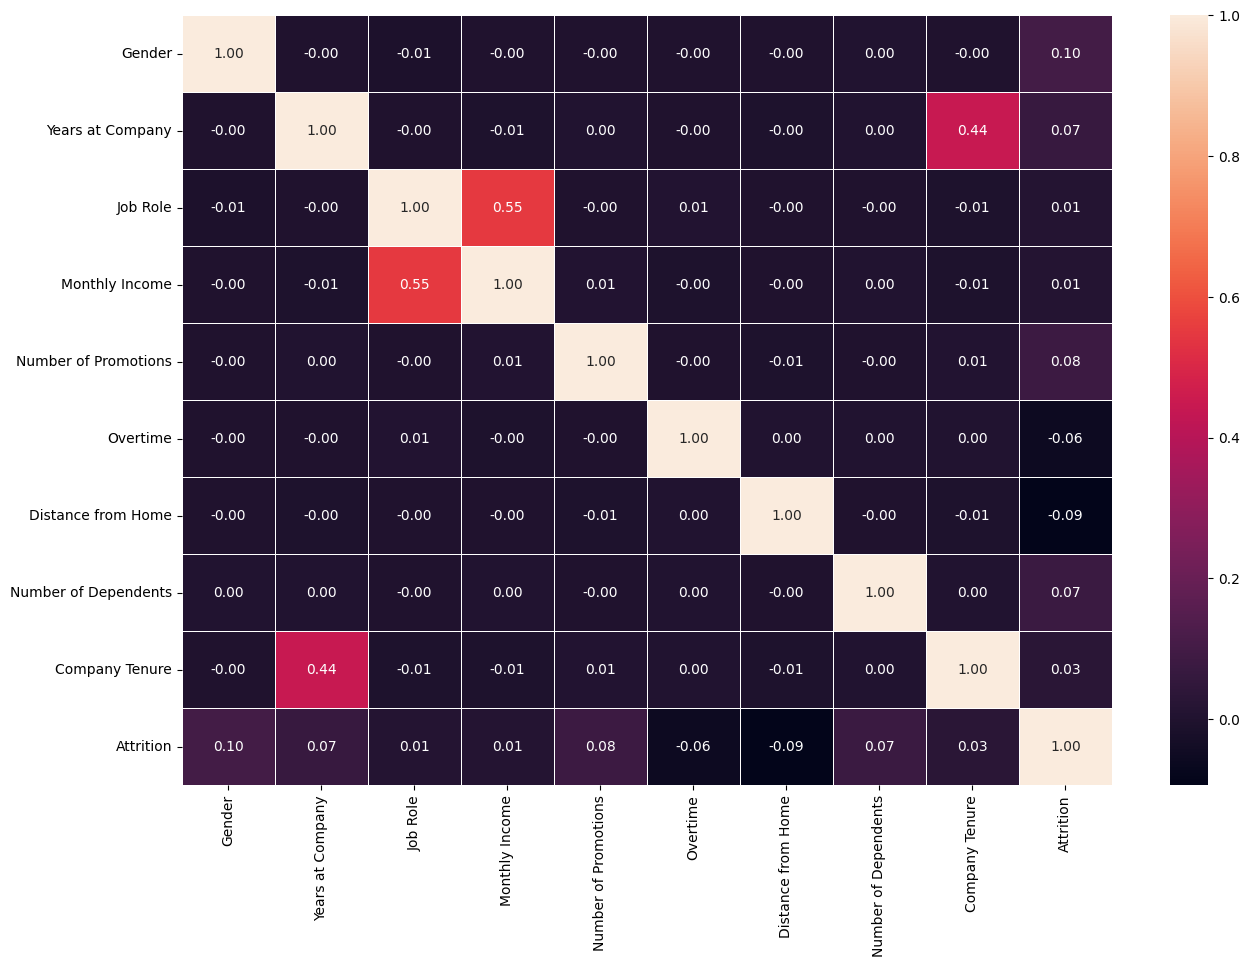

In [70]:
# Let's make our correlation matrix visual
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

## Now, from the processed data we have to separate the features and target column again.



In [71]:
y = data["Attrition"]
X = data.drop("Attrition",axis=1)

## Splitting data – Train test split


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Model Development

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Initializing the models

In [74]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [75]:
from sklearn.metrics import accuracy_score
for a,b in zip([lr,dt,knn,rm],["Logistic Regression","Decision Tree","KNN","Random Forest"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.578848
[Logistic Regression] test data accuracy is : 0.581852
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.527302
[KNN] training data accuracy is : 0.754300
[KNN] test data accuracy is : 0.511570
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.562523


Here the training data accuracy for random forest and decision tree is 100% comapred to logistic and knn

## Checking out the Model Scores

In [76]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
             }
model_scores

{'Logistic Regression': 0.5818523489932886,
 'KNN classifier': 0.5115704697986577,
 'Random forest': 0.5625234899328859,
 'Decision tree': 0.5273020134228188}

Here Logistic Regression and Random Forest gives the best accuracy compared to knn and decision tree

## Classification Report of Random forest


In [77]:
from sklearn.metrics import classification_report
rm_y_preds = rm.predict(X_test)
print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53      8871
           1       0.58      0.61      0.59      9754

    accuracy                           0.56     18625
   macro avg       0.56      0.56      0.56     18625
weighted avg       0.56      0.56      0.56     18625



## Classification Report of Logistic Regression

In [78]:
from sklearn.metrics import classification_report
lr_y_preds = lr.predict(X_test)
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      8871
           1       0.59      0.69      0.63      9754

    accuracy                           0.58     18625
   macro avg       0.58      0.58      0.57     18625
weighted avg       0.58      0.58      0.58     18625



## Model Comparison


In [79]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest,Decision tree
accuracy,0.581852,0.51157,0.562523,0.527302


## Visualize the accuracy of each model


<Axes: >

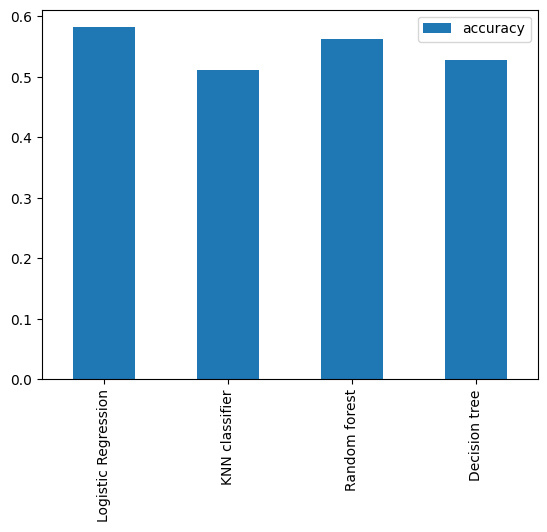

In [80]:
model_compare.T.plot(kind='bar')

Random Forest has 1% better accuracy than Logistic regression

But Random Forest is an overfitted model hence we will select Logistic regression.